In [34]:
import pandas as pd
import numpy as np
import sys
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline

In [35]:
df=pd.read_excel("C:\\Users\\prana\\Downloads\\kk\\New Problem Statement\\Training Dataset.xlsx")

In [36]:
df.dtypes

objid          int64
ra           float64
dec          float64
u            float64
g            float64
r            float64
i            float64
z            float64
run            int64
rerun          int64
camcol         int64
field          int64
specobjid     uint64
redshift     float64
plate          int64
mjd            int64
fiberid        int64
class         object
dtype: object

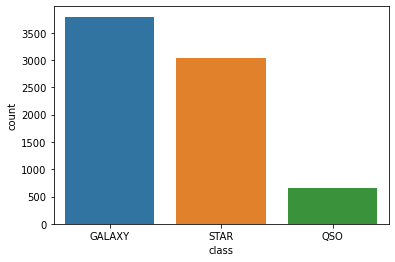

In [37]:
sns.countplot(df['class'])

In [38]:
df.isna().sum()*100/len(df)

objid        0.0
ra           0.0
dec          0.0
u            0.0
g            0.0
r            0.0
i            0.0
z            0.0
run          0.0
rerun        0.0
camcol       0.0
field        0.0
specobjid    0.0
redshift     0.0
plate        0.0
mjd          0.0
fiberid      0.0
class        0.0
dtype: float64

In [39]:
df['class']

0       GALAXY
1         STAR
2         STAR
3       GALAXY
4          QSO
         ...  
7491    GALAXY
7492    GALAXY
7493    GALAXY
7494      STAR
7495    GALAXY
Name: class, Length: 7496, dtype: object

In [40]:
df['class'].replace('GALAXY',0,inplace=True)
df['class'].replace('STAR',1,inplace=True)
df['class'].replace('QSO',2,inplace=True)

In [41]:
target=df['class']

In [42]:
target

0       0
1       1
2       1
3       0
4       2
       ..
7491    0
7492    0
7493    0
7494    1
7495    0
Name: class, Length: 7496, dtype: int64

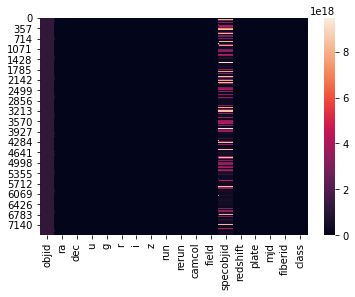

In [43]:
sns.heatmap(df)

In [44]:
df.drop(columns={'class'},inplace=True)

In [45]:
from sklearn.preprocessing import MinMaxScaler

In [46]:
s=MinMaxScaler()

In [47]:
df=s.fit_transform(df)

In [48]:
df=pd.DataFrame(df)

# Feature Selection

In [49]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [50]:
bestfeatures=SelectKBest(score_func=chi2,k=10)
fit=bestfeatures.fit(df,target)

In [51]:
dfscores=pd.DataFrame(fit.scores_)
dfcolumns=pd.DataFrame(df.columns)

In [52]:
featuresscores=pd.concat([dfcolumns,dfscores],axis=1)
featuresscores.columns=['Features','Scores']

In [53]:
featuresscores

,Features,Scores
0,0,NaN
1,1,0.559715
2,2,30.558218
3,3,11.793868
4,4,39.307119
5,5,36.017070
6,6,32.226110
7,7,53.864505
8,8,35.887552
9,9,NaN


In [54]:
print(featuresscores.nlargest(11,'Scores'))

    Features       Scores
13        13  1027.178232
15        15   864.992651
12        12   833.318901
14        14   833.313415
7          7    53.864505
4          4    39.307119
5          5    36.017070
8          8    35.887552
6          6    32.226110
2          2    30.558218
3          3    11.793868


In [55]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.0,0.697932,0.055956,0.468821,0.276730,0.151344,0.133203,0.217569,0.010495,0.0,0.4,0.347424,0.281432,0.000772,0.281434,0.434017,0.191191
1,0.0,0.698163,0.055719,0.841773,0.615109,0.343075,0.277838,0.425591,0.010495,0.0,0.4,0.347424,0.281436,0.000749,0.281434,0.434017,0.316316
2,0.0,0.697842,0.056210,0.945150,0.735469,0.410814,0.327995,0.493338,0.010495,0.0,0.4,0.347424,0.373292,0.000950,0.373281,0.566492,0.586587
3,0.0,0.698223,0.053968,0.977613,0.728381,0.383443,0.292152,0.425320,0.010495,0.0,0.4,0.347424,0.002697,0.020922,0.002701,0.071489,0.189189
4,0.0,0.698391,0.054463,0.901074,0.843896,0.498456,0.397878,0.596971,0.010495,0.0,0.4,0.348745,0.002697,0.283815,0.002701,0.071489,0.194194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7491,0.0,0.783859,0.060221,0.902923,0.700674,0.396373,0.312647,0.467072,0.010495,0.0,0.6,0.538970,0.004173,0.015140,0.004175,0.061833,0.262262
7492,0.0,0.784113,0.060017,0.976900,0.658415,0.330681,0.254331,0.364249,0.010495,0.0,0.6,0.538970,0.004173,0.017234,0.004175,0.061833,0.276276
7493,0.0,0.784392,0.060199,0.963647,0.736453,0.409320,0.323074,0.485361,0.010495,0.0,0.6,0.540291,0.004060,0.009662,0.004052,0.015755,0.596597
7494,0.0,0.433715,0.657623,0.832278,0.782714,0.507431,0.433982,0.693610,0.985007,0.0,0.6,0.091149,0.983549,0.000781,0.983546,0.929866,0.146146


In [56]:
dffinal=df[[13,15,12,14,8,5,7,4,6,2,3]]

In [57]:
dffinal

,13,15,12,14,8,5,7,4,6,2,3
0,0.000772,0.434017,0.281432,0.281434,0.010495,0.151344,0.217569,0.276730,0.133203,0.055956,0.468821
1,0.000749,0.434017,0.281436,0.281434,0.010495,0.343075,0.425591,0.615109,0.277838,0.055719,0.841773
2,0.000950,0.566492,0.373292,0.373281,0.010495,0.410814,0.493338,0.735469,0.327995,0.056210,0.945150
3,0.020922,0.071489,0.002697,0.002701,0.010495,0.383443,0.425320,0.728381,0.292152,0.053968,0.977613
4,0.283815,0.071489,0.002697,0.002701,0.010495,0.498456,0.596971,0.843896,0.397878,0.054463,0.901074
...,...,...,...,...,...,...,...,...,...,...,...
7491,0.015140,0.061833,0.004173,0.004175,0.010495,0.396373,0.467072,0.700674,0.312647,0.060221,0.902923
7492,0.017234,0.061833,0.004173,0.004175,0.010495,0.330681,0.364249,0.658415,0.254331,0.060017,0.976900
7493,0.009662,0.015755,0.004060,0.004052,0.010495,0.409320,0.485361,0.736453,0.323074,0.060199,0.963647
7494,0.000781,0.929866,0.983549,0.983546,0.985007,0.507431,0.693610,0.782714,0.433982,0.657623,0.832278


In [58]:
dffinal

,13,15,12,14,8,5,7,4,6,2,3
0,0.000772,0.434017,0.281432,0.281434,0.010495,0.151344,0.217569,0.276730,0.133203,0.055956,0.468821
1,0.000749,0.434017,0.281436,0.281434,0.010495,0.343075,0.425591,0.615109,0.277838,0.055719,0.841773
2,0.000950,0.566492,0.373292,0.373281,0.010495,0.410814,0.493338,0.735469,0.327995,0.056210,0.945150
3,0.020922,0.071489,0.002697,0.002701,0.010495,0.383443,0.425320,0.728381,0.292152,0.053968,0.977613
4,0.283815,0.071489,0.002697,0.002701,0.010495,0.498456,0.596971,0.843896,0.397878,0.054463,0.901074
...,...,...,...,...,...,...,...,...,...,...,...
7491,0.015140,0.061833,0.004173,0.004175,0.010495,0.396373,0.467072,0.700674,0.312647,0.060221,0.902923
7492,0.017234,0.061833,0.004173,0.004175,0.010495,0.330681,0.364249,0.658415,0.254331,0.060017,0.976900
7493,0.009662,0.015755,0.004060,0.004052,0.010495,0.409320,0.485361,0.736453,0.323074,0.060199,0.963647
7494,0.000781,0.929866,0.983549,0.983546,0.985007,0.507431,0.693610,0.782714,0.433982,0.657623,0.832278


# Random Forest

In [59]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(dffinal,target,test_size=0.2)

In [60]:
from sklearn import metrics
from sklearn.metrics import log_loss
from sklearn.ensemble import RandomForestClassifier

In [61]:
#from sklearn.preprocessing import StandardScaler
#sc=StandardScaler()
#dffinal=sc.fit_transform(dffinal)

In [62]:
{'criterion': 'gini',
 'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 20}

{'criterion': 'gini',
 'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 20}

In [63]:
#model building with Random Forest
model=RandomForestClassifier(n_estimators=20,max_depth=9,min_samples_leaf=1,min_samples_split=2)
model.fit(X_train,y_train)
y_pred1=model.predict(X_test) 
accuracy=metrics.accuracy_score(y_test,y_pred1)
print(accuracy)


0.9893333333333333


In [64]:
ypredproba=model.predict_proba(X_test)

In [65]:
log_loss(y_pred1,ypredproba)

0.022908688518407928

In [66]:
from sklearn.metrics import classification_report
print(metrics.classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       777
           1       1.00      0.99      1.00       584
           2       0.97      0.95      0.96       139

    accuracy                           0.99      1500
   macro avg       0.98      0.98      0.98      1500
weighted avg       0.99      0.99      0.99      1500



# Random Forest with Hyperparameter Tuning

In [67]:
from sklearn.ensemble import RandomForestClassifier

In [68]:
from sklearn.model_selection import GridSearchCV

In [36]:
pd.set_option('display.max_rows', 500)

In [37]:
ytr=pd.DataFrame(y_train)

In [38]:
X_train.dtypes

13    float64
15    float64
12    float64
14    float64
8     float64
5     float64
7     float64
4     float64
6     float64
2     float64
dtype: object

In [39]:
y_train.dtypes

dtype('int64')

# CV=3

In [69]:
gscv=GridSearchCV(RandomForestClassifier(),  {
     'n_estimators':[1,10,20,30,40],
     'max_depth':[5,9,15,20,25,30],
     'min_samples_split' :[2, 5, 10, 15],
     'min_samples_leaf' : [1, 2, 5, 10],
     'criterion':['entropy','gini']
},cv=3, return_train_score=False)

gscv.fit(X_train,y_train)
gscv.cv_results_

{'mean_fit_time': array([0.00764592, 0.04854957, 0.09508236, 0.14195236, 0.18782473,
        0.00631277, 0.04852581, 0.09474476, 0.1379571 , 0.18687622,
        0.00599273, 0.04720251, 0.09215403, 0.13862141, 0.19289215,
        0.00632683, 0.04953631, 0.10437703, 0.16489283, 0.19946599,
        0.00731317, 0.05452514, 0.0997262 , 0.15358837, 0.1948127 ,
        0.00667103, 0.0485452 , 0.09708293, 0.14227287, 0.19009193,
        0.00598399, 0.04620957, 0.0944109 , 0.14461247, 0.19615523,
        0.00630498, 0.04988511, 0.09444276, 0.14230545, 0.18516548,
        0.00598303, 0.04687492, 0.09408935, 0.14299655, 0.1924928 ,
        0.00664695, 0.0525345 , 0.09684809, 0.14130624, 0.20535787,
        0.00564973, 0.04854925, 0.09405653, 0.14063104, 0.19371025,
        0.00598709, 0.04820307, 0.091091  , 0.14991593, 0.18982514,
        0.0063173 , 0.04787366, 0.09408911, 0.14232628, 0.18819459,
        0.00565243, 0.04754996, 0.0924201 , 0.14380511, 0.18387262,
        0.00950543, 0.05286471,

In [70]:
modelresultview=pd.DataFrame(gscv.cv_results_)

In [71]:
modelresultview

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.007646,0.001695,0.000997,2.973602e-07,entropy,5,1,2,1,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.986493,0.952976,0.971972,0.970480,0.013725,863
1,0.048550,0.002891,0.002663,4.715715e-04,entropy,5,1,2,10,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.983492,0.982991,0.984985,0.983823,0.000847,729
2,0.095082,0.001255,0.003989,1.890719e-06,entropy,5,1,2,20,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.981991,0.988494,0.982482,0.984323,0.002957,709
3,0.141952,0.002618,0.005653,4.688979e-04,entropy,5,1,2,30,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.987494,0.986993,0.982482,0.985657,0.002254,624
4,0.187825,0.006130,0.007315,4.694109e-04,entropy,5,1,2,40,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.983492,0.988494,0.982983,0.984990,0.002487,667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,0.005319,0.000470,0.000998,1.946680e-07,gini,30,10,15,1,"{'criterion': 'gini', 'max_depth': 30, 'min_sa...",0.974487,0.947474,0.956456,0.959473,0.011233,924
956,0.043553,0.002053,0.002660,4.700217e-04,gini,30,10,15,10,"{'criterion': 'gini', 'max_depth': 30, 'min_sa...",0.986993,0.987994,0.983984,0.986324,0.001704,533
957,0.081790,0.001404,0.004646,4.638558e-04,gini,30,10,15,20,"{'criterion': 'gini', 'max_depth': 30, 'min_sa...",0.987494,0.988494,0.983483,0.986491,0.002165,487
958,0.125331,0.003291,0.006649,4.703588e-04,gini,30,10,15,30,"{'criterion': 'gini', 'max_depth': 30, 'min_sa...",0.987494,0.986993,0.984985,0.986491,0.001084,487


In [72]:
modelresultview[['param_max_depth','param_min_samples_leaf','param_min_samples_split','param_n_estimators','mean_test_score']]

,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,mean_test_score
0,5,1,2,1,0.970480
1,5,1,2,10,0.983823
2,5,1,2,20,0.984323
3,5,1,2,30,0.985657
4,5,1,2,40,0.984990
...,...,...,...,...,...
955,30,10,15,1,0.959473
956,30,10,15,10,0.986324
957,30,10,15,20,0.986491
958,30,10,15,30,0.986491


In [73]:
gscv.best_score_

0.9886591060707138

In [74]:
gscv.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 20}

In [87]:
modelfinal=RandomForestClassifier(criterion='entropy',max_depth=9,min_samples_leaf=1,min_samples_split=2,n_estimators=20)

In [88]:
modelfinal.fit(X_train,y_train)
y_pred1=modelfinal.predict(X_test) 
accuracy=metrics.accuracy_score(y_test,y_pred1)
print(accuracy)

0.9893333333333333


# CV=5

In [86]:
gscv1=GridSearchCV(RandomForestClassifier(),  {
     'n_estimators':[1,10,20,30,40,50],
     'max_depth':[5,9,15,20,25,30],
     'min_samples_split' :[2, 5, 10, 15],
     'min_samples_leaf' : [1, 2, 5, 10],
     'criterion':['entropy','gini']
},cv=4, return_train_score=False)

gscv1.fit(X_train,y_train)
gscv1.cv_results_

{'mean_fit_time': array([0.00411081, 0.02268767, 0.04242849, ..., 0.05261809, 0.06507558,
        0.09025776]),
 'std_fit_time': array([0.00072842, 0.00043135, 0.00088966, ..., 0.00108848, 0.00148045,
        0.00386952]),
 'mean_score_time': array([0.00124538, 0.00198728, 0.00244558, ..., 0.00374043, 0.00474334,
        0.00623435]),
 'std_score_time': array([0.00043285, 0.00071764, 0.00054845, ..., 0.00042982, 0.00082084,
        0.00042231]),
 'param_criterion': masked_array(data=['entropy', 'entropy', 'entropy', ..., 'gini', 'gini',
                    'gini'],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_array(data=[5, 5, 5, ..., 30, 30, 30],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=object),
 'param_min_samples_leaf': masked_array(data=[1, 1, 1, ..., 10, 10, 10],
              mask=[False, False, False, ..., Fal

In [87]:
modelresultview1=pd.DataFrame(gscv1.cv_results_)

In [88]:
gscv1.best_score_

0.915

In [89]:
gscv1.best_params_

{'criterion': 'gini',
 'max_depth': 25,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 50}

# Evaluating on the test set

In [76]:
test_set=pd.read_excel("C:\\Users\\prana\\Downloads\\kk\\New Problem Statement\\Testing Dataset.xlsx")

In [77]:
test_set.drop(columns={'class'},inplace=True)

In [78]:
testsetf2=s.fit_transform(test_set)

In [79]:
testsetf2=pd.DataFrame(testsetf2)

In [80]:
testsetf=test_set[['specobjid','plate','mjd','run','field','fiberid','ra','z','i','r','g']]

In [81]:
testsetf2.isna().sum()*100/len(testsetf2)

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
15    0.0
16    0.0
dtype: float64

In [82]:
testsetf22=testsetf2[[13,15,12,14,8,5,7,4,6,2,3]]

In [89]:
ypredfinalcv=modelfinal.predict(testsetf22)

In [90]:
ypredfinalcvdf=pd.DataFrame(ypredfinalcv)

In [91]:
ypredfinalcvdf.head(5)

,0
0,1
1,1
2,0
3,1
4,1


In [92]:
ypredfinalprobacv=modelfinal.predict_proba(testsetf22)

In [93]:
log_loss(ypredfinalcv,ypredfinalprobacv)

0.10588455221808984

In [94]:
ypredfinalcv1=gscv.predict(testsetf22)

In [95]:
ypredfinalprobacv1=gscv.predict_proba(testsetf22)

In [96]:
log_loss(ypredfinalcv1,ypredfinalprobacv1)

0.1411520963902645

# SVM Implementation

In [44]:
from sklearn import svm
modelsvm=svm.SVC(kernel='linear',probability=True)
modelsvm

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [45]:
modelsvm.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [46]:
y_predsvm=modelsvm.predict(X_test)

In [47]:
from sklearn.preprocessing import label_binarize
y_predsvm=label_binarize(y_predsvm,classes=[0,1,2])

In [48]:
metrics.accuracy_score(y_test,y_predsvm)

0.9800399201596807

In [49]:
ypredsvmproba=modelsvm.predict_proba(X_test)

In [50]:
log_loss(y_predsvm,ypredsvmproba)

0.04014468893486571

In [51]:
y_predtestsvm=modelsvm.predict(test_set_final)

In [52]:
y_predtestsvmproba=modelsvm.predict_proba(test_set_final)

In [53]:
log_loss(y_predtestsvm,y_predtestsvmproba)

0.05236124107817993

## GB

In [107]:
from sklearn.ensemble import GradientBoostingClassifier

In [108]:
##Building the model
gb=GradientBoostingClassifier(n_estimators=20,learning_rate=0.5,max_depth=25,random_state=0)
gb.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.5, loss='deviance', max_depth=25,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=20,
                           n_iter_no_change=None, presort='auto',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [109]:
ypredgb=gb.predict(test_set_final1)

In [110]:
ypredprobagb=gb.predict_proba(test_set_final1)

In [111]:
log_loss(ypredgb,ypredprobagb)

0.00041471773129837287

In [112]:
predictions=pd.DataFrame(ypredgb)

In [113]:
predictions.head(50)

,0
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


# XGBOOST 

In [97]:
import xgboost as xgb

In [98]:
from sklearn.metrics import precision_score

In [99]:
modelxg=xgb.XGBClassifier()

In [100]:
modelxg.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [101]:
p1=np.linspace(1e-16,1,3)

In [102]:
params_grid={
     'n_estimators':[1,10,20,30,40,50],
     'max_depth':[5,9,15,20,25,30],
     'min_child_weight' :[2, 5, 10, 15]    
}

In [103]:
params_fixed={
    'objective':'binary:logistic'
    
}

In [104]:
seed=342
np.random.rand(seed)

array([0.96310968, 0.25875258, 0.52515098, 0.09753395, 0.49694191,
       0.58351578, 0.25661109, 0.12425528, 0.68259563, 0.26389695,
       0.88907191, 0.92776575, 0.96870199, 0.41316555, 0.4079235 ,
       0.83828388, 0.79951713, 0.12958636, 0.73160982, 0.14502634,
       0.74744978, 0.02660862, 0.07078528, 0.81553848, 0.85235143,
       0.25978386, 0.99281349, 0.79615358, 0.41927128, 0.87839363,
       0.33876429, 0.26882851, 0.34100983, 0.6017562 , 0.68799958,
       0.67818614, 0.16514754, 0.52440337, 0.34092533, 0.04080853,
       0.67892694, 0.25804012, 0.62415115, 0.54888208, 0.18783419,
       0.87590205, 0.13603083, 0.98036816, 0.81441653, 0.21963111,
       0.43191369, 0.82275826, 0.61602918, 0.2591937 , 0.8295777 ,
       0.31917983, 0.03313154, 0.41678567, 0.81382303, 0.88160286,
       0.61326505, 0.15888122, 0.05538161, 0.34871012, 0.71557714,
       0.14196686, 0.76896141, 0.0708396 , 0.37554922, 0.31385103,
       0.16037909, 0.44391895, 0.96988968, 0.46728298, 0.40784

In [108]:
bst_grid= GridSearchCV(
   estimator=xgb.XGBClassifier(**params_fixed,seed=seed),
   param_grid=params_grid,
   cv=cv,
   scoring='accuracy'  
)

In [106]:
from sklearn.model_selection import StratifiedKFold

In [107]:
cv=StratifiedKFold(n_splits=10,shuffle=True,random_state=seed)

In [109]:
bst_grid.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=342, shuffle=True),
             error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth...
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     seed=342, subsample=None, tree_method=None,
                                     validate_parameters=None, verbosity=None),
             iid='warn', n_jobs=None

In [110]:
ypredfinalxght=bst_grid.predict(X_test)

In [111]:
ypredfinalxghtproba=bst_grid.predict_proba(X_test)

In [112]:
bst_grid.best_score_

0.9898265510340227

In [113]:
bst_grid.best_params_

{'max_depth': 9, 'min_child_weight': 2, 'n_estimators': 30}

In [114]:
log_loss(ypredfinalxght,ypredfinalxghtproba)

0.006755978085187962

In [79]:
ypredxg=modelxg.predict(X_test)

In [80]:
ypredxg

array([1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 2, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 2, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 2, 0, 1, 1, 2, 0, 0, 0, 1, 0, 0, 0, 2, 1, 0,
       0, 1, 2, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 2, 0, 2, 0, 1,
       0, 0, 0, 1, 2, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 2, 0, 1, 2, 0,
       0, 1, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 2, 0, 0, 1, 2, 1, 0, 0, 1, 2, 0, 2, 1, 0, 1,
       2, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 2, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 2, 0, 1, 2, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 2, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 2, 0, 2, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 1, 1, 1, 2, 0,

In [81]:
ypredprobaxg=modelxg.predict_proba(X_test)

In [82]:
log_loss(ypredxg,ypredprobaxg)

0.0030791389658543357

In [83]:
testsetf22

,13,15,12,14,8,5,7,4,6,2
0,0.000770,0.566492,0.373289,0.373281,0.402174,0.284177,0.322284,0.617349,0.219081,0.074025
1,0.000762,0.006268,0.007006,0.006999,0.402174,0.343138,0.426255,0.642389,0.279811,0.074642
2,0.023749,0.075385,0.002584,0.002579,0.402174,0.407640,0.462786,0.784575,0.316657,0.074519
3,0.000751,0.566492,0.373290,0.373281,0.402174,0.301490,0.382826,0.553374,0.248584,0.073487
4,0.000882,0.566492,0.373290,0.373281,0.402174,0.323925,0.446026,0.504005,0.283858,0.074199
...,...,...,...,...,...,...,...,...,...,...
7494,0.015140,0.061833,0.004173,0.004175,0.402174,0.396373,0.467328,0.725828,0.312647,0.073406
7495,0.017234,0.061833,0.004174,0.004175,0.402174,0.330681,0.364449,0.682052,0.254331,0.073205
7496,0.009662,0.015755,0.004060,0.004052,0.402174,0.409320,0.485627,0.762892,0.323074,0.073385
7497,0.000781,0.929866,0.983549,0.983546,0.990942,0.507431,0.693990,0.810814,0.433982,0.662427


# evaluation on test set 

In [115]:
#with hyperparameter tuning model
ypredtestxg1=bst_grid.predict(testsetf22)
ypredprobatestxg1=bst_grid.predict_proba(testsetf22)
log_loss(ypredtestxg1,ypredprobatestxg1)

0.019551231625214473

In [117]:
final_pred1=pd.DataFrame(ypredtestxg1)
final_pred1.replace(0,'GALAXY',inplace=True)
final_pred1.replace(1,'STAR',inplace=True)
final_pred1.replace(2,'QSO',inplace=True)
final_pred1.to_csv("C:\\Users\\prana\\Desktop\\netro ai\\final_pred1.csv")

In [ ]:
ypredtestxg=modelxg.predict(testsetf22)

In [85]:
ypredprobatestxg=modelxg.predict_proba(testsetf22)

In [86]:
log_loss(ypredtestxg,ypredprobatestxg)

0.010190505908585256

# With Hyperparamter tuning

In [259]:
ypredtestsetxgfinal=bst_grid.predict(testsetf22)

In [260]:
ypredtestsetxgfinalproba=bst_grid.predict_proba(testsetf22)

In [261]:
log_loss(ypredtestsetxgfinal,ypredtestsetxgfinalproba)

0.030943395689363065